# Exercice 1: Création d'une base de données simple
O. Kaufmann 2018, 2022.

### @info
Exécuter une à une les cellules déjà présentes en prenant soin de comprendre leur contenu.  
Compléter le notebook là où c'est nécessaire.

### @warning
Pour exécuter ce notebook il faut que votre environnement virtuel soit actif et à jour.

## @section | Initialisation du notebook

In [1]:
### @manage_solutions

### @subsection | Chargement des <i>packages</i> python

In [2]:
from eralchemy import render_er
from IPython.display import SVG, Image

### @info 
Ces <i>packages</i> offrent donnent accès à des fonctionnalités supplémentaires:  
- <i>render_er</i> sert à créer une représentation graphique de la base de données  
- <i>SVG</i> et <i>Image</i> servent à afficher des images dans le notebook

### @subsection | Chargement de l'extension sql pour jupyter et ouverture d'une base de donnée sqlite3

Charger l'extension de Jupyter pour traiter SQL

In [3]:
%load_ext sql

Obtenir de l'aide sur une fonction dans un notebook avec '?'

Effacer le fichier de la base de données si il existe...

### @info
    Le point d'exclamation en début de ligne permet d'exécuter des commandes bash depuis le notebook

In [4]:
! rm example_db.db

Création d'une base de données vide (car elle n'existe pas puisqu'on vient d'effacer le fichier!)  
### @info
    Si le fichier existait, on pourrait se connecter à la base existante de la même façon...

In [5]:
%sql sqlite:///example_db.db

## @subsection | Création des tables

In [6]:
%%sql 
CREATE TABLE ouvrages(
    nom TEXT PRIMARY KEY,
    commune TEXT  
);

 * sqlite:///example_db.db
Done.


[]

In [7]:
%%sql
CREATE TABLE piezometres(
    nom TEXT, 
    enregistreur TEXT,
    PRIMARY KEY(nom),
    FOREIGN KEY(nom) REFERENCES ouvrages(nom) ON DELETE CASCADE
);

 * sqlite:///example_db.db
Done.


[]

In [8]:
%%sql
CREATE TABLE puits_captages(
    nom TEXT,
    type_pompe TEXT,
    PRIMARY KEY(nom),
    FOREIGN KEY(nom) REFERENCES ouvrages(nom) ON DELETE CASCADE
);

 * sqlite:///example_db.db
Done.


[]

In [9]:
%%sql
CREATE TABLE prelevements(
    nom_puits TEXT,
    annee INTEGER,
    volume REAL,
    PRIMARY KEY(nom_puits, annee),
    FOREIGN KEY(nom_puits) REFERENCES puits_captages(nom) ON DELETE CASCADE
    );

 * sqlite:///example_db.db
Done.


[]

### @subsection | Afficher le schéma de la base de données sous forme graphique

### @info
    render_er crée un fichier image au format ".png" du schéma de la base de données qui est ensuite affiché dans le notebook avec la méthode Image().
    Il est aussi possible de générer un schéma dans un fichier image vectoriel au format ".svg" (Scalable Vector Graphics). Le fichier ainsi créé peut être affiché avec la méthode SVG(). 

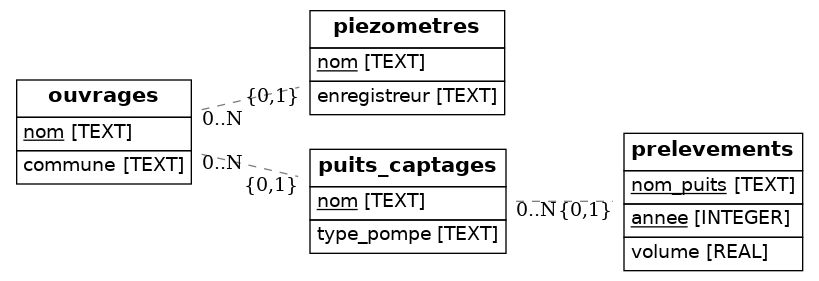

In [10]:
render_er('sqlite:///example_db.db', 'example_db_schema.png')
Image(filename='example_db_schema.png')

## @question
Ajouter la définition de la table "niveaux" reprenant les niveaux relevés dans les piezomètres.<br> 
Les champs seront nommés "nom_piezo", "date_releve" et "niveau".

In [11]:
# @solution @keep_output
%sql CREATE TABLE niveaux(nom_piezo TEXT, date_releve DATE, niveau REAL, PRIMARY KEY(nom_piezo, date_releve), FOREIGN KEY(nom_piezo) REFERENCES piezometres(nom) ON DELETE CASCADE); 

 * sqlite:///example_db.db
Done.


[]

## @subsection |  Activer de l'intégrité référentielle
<div class="alert alert-block alert-info">
    <b>Tip:</b> pour des raisons de rétro-compatibilité, l'intégrité référentielle n'est pas activée par défaut dans sqlite...
</div>  

In [12]:
%%sql
PRAGMA foreign_keys = ON;
PRAGMA foreign_keys;

 * sqlite:///example_db.db
Done.
Done.


foreign_keys
1


## @subsection | Afficher le schéma complété sous forme graphique

<div class="alert alert-block alert-success">
    Ajouter les commandes nécessaires pour afficher le schéma complété de la base de données en utilisant le format ".svg"
</div>  

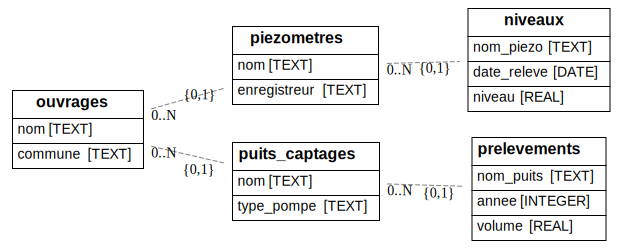

In [13]:
# @solution @reveal
# Draw schema from database
render_er('sqlite:///example_db.db', 'example_db_schema.svg')
SVG('example_db_schema.svg')

## @subsection | Afficher la liste des tables de la base de données
<div class="alert alert-block alert-info">
    <b>Tip:</b> sqlite_master est une table particulière dans laquelle SQLite stocke les informations propres à la structure de la base de données
</div>  

In [14]:
%%sql
SELECT name, sql FROM sqlite_master
WHERE type='table'
ORDER BY name;

 * sqlite:///example_db.db
Done.


name,sql
niveaux,"CREATE TABLE niveaux(nom_piezo TEXT, date_releve DATE, niveau REAL, PRIMARY KEY(nom_piezo, date_releve), FOREIGN KEY(nom_piezo) REFERENCES piezometres(nom) ON DELETE CASCADE)"
ouvrages,"CREATE TABLE ouvrages( nom TEXT PRIMARY KEY, commune TEXT )"
piezometres,"CREATE TABLE piezometres( nom TEXT, enregistreur TEXT, PRIMARY KEY(nom), FOREIGN KEY(nom) REFERENCES ouvrages(nom) ON DELETE CASCADE)"
prelevements,"CREATE TABLE prelevements( nom_puits TEXT, annee INTEGER, volume REAL, PRIMARY KEY(nom_puits, annee), FOREIGN KEY(nom_puits) REFERENCES puits_captages(nom) ON DELETE CASCADE )"
puits_captages,"CREATE TABLE puits_captages( nom TEXT, type_pompe TEXT, PRIMARY KEY(nom), FOREIGN KEY(nom) REFERENCES ouvrages(nom) ON DELETE CASCADE)"
